In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Sample - Superstore.csv", encoding = "latin-1")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.isnull().sum().sum()

0

# Data PreProcessing

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Adding New Date-Based Columns

In [9]:
df["Order Month"] = df["Order Date"].dt.month
df["Order Year"] = df["Order Date"].dt.year
df["Order Day Of Week"] = df["Order Date"].dt.dayofweek
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day Of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1


# Data Visualization

# 1. You need to calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales?

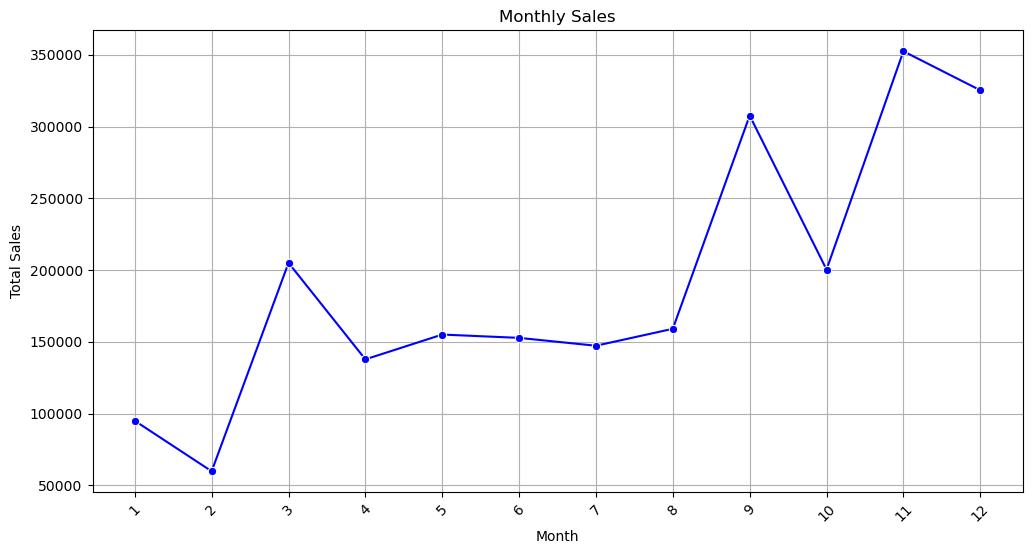

In [10]:
monthly_sales = df.groupby("Order Month")["Sales"].sum().reset_index()

max_month = monthly_sales.loc[monthly_sales["Sales"].idxmax()]
min_month = monthly_sales.loc[monthly_sales["Sales"].idxmin()]

f"Highest Sales Month: {max_month['Order Month']} with ${max_month['Sales']:.2f}"
f"Lowest Sales Month: {min_month['Order Month']} with ${min_month['Sales']:.2f}"

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales["Order Month"].astype(str), y=monthly_sales["Sales"], marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales")
plt.grid(True)
plt.show()

# 2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales?

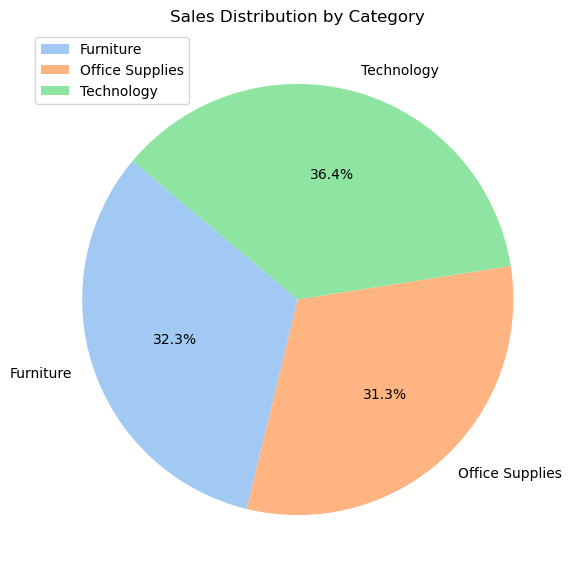

In [11]:
category_sales = df.groupby("Category")["Sales"].sum().reset_index()

max_category = category_sales.loc[category_sales["Sales"].idxmax()]
min_category = category_sales.loc[category_sales["Sales"].idxmin()]

f"Highest Sales Category: {max_category['Category']} with ${max_category['Sales']:.2f}"
f"Lowest Sales Category: {min_category['Category']} with ${min_category['Sales']:.2f}"

plt.figure(figsize=(8, 7))
sns.set_palette("pastel")
plt.pie(category_sales["Sales"], labels=category_sales["Category"], autopct="%1.1f%%", startangle=140)
plt.title("Sales Distribution by Category")
plt.legend(loc = 2)
plt.show()

# 3. The sales analysis needs to be done based on sub-categories?

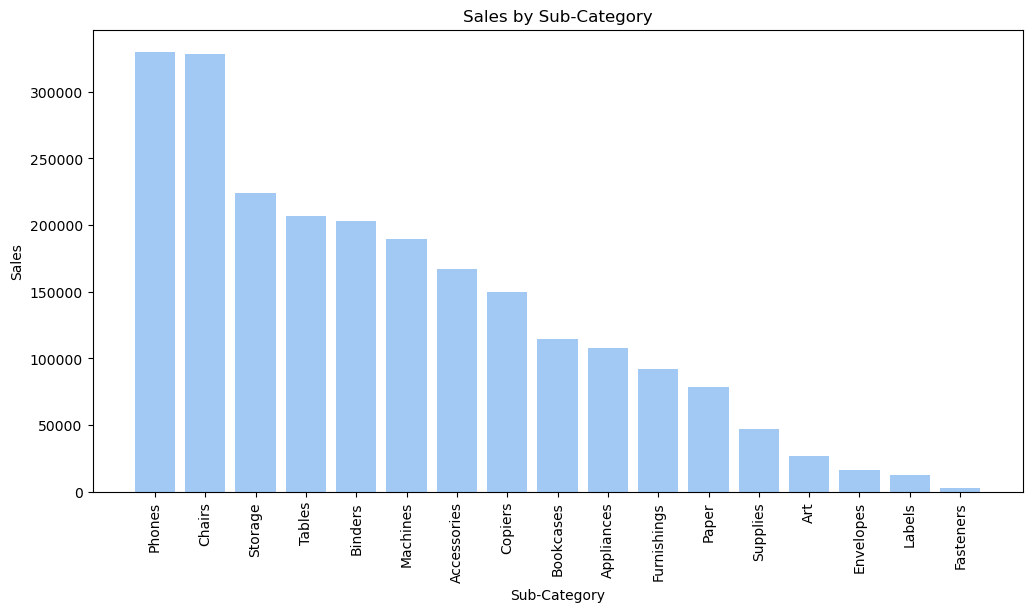

In [12]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sub_category_sales['Sub-Category'], sub_category_sales['Sales'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=90)
plt.show()

# 4. You need to analyze the monthly profit from sales and determine which month had the highest profit?

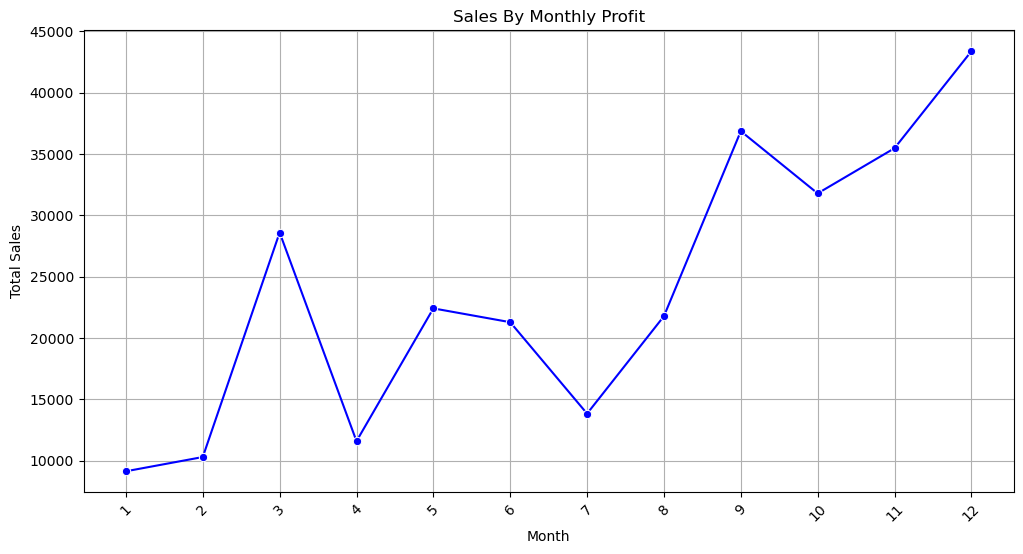

In [13]:
sales_by_monthly_profit = df.groupby("Order Month")["Profit"].sum().reset_index()

max_month = sales_by_monthly_profit.loc[sales_by_monthly_profit["Profit"].idxmax()]
min_month = sales_by_monthly_profit.loc[sales_by_monthly_profit["Profit"].idxmin()]

f"Highest Sales Month: {max_month['Order Month']} with ${max_month['Profit']:.2f}"
f"Lowest Sales Month: {min_month['Order Month']} with ${min_month['Profit']:.2f}"

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_monthly_profit["Order Month"].astype(str), y=sales_by_monthly_profit["Profit"], marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales By Monthly Profit")
plt.grid(True)
plt.show()

# 5. Analyze the profit by category and sub-category?

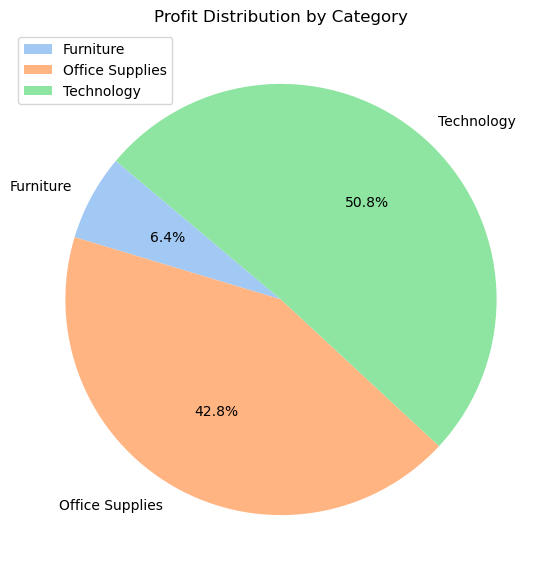

In [14]:
profit_by_category = df.groupby("Category")["Profit"].sum().reset_index()

max_category = profit_by_category.loc[profit_by_category["Profit"].idxmax()]
min_category = profit_by_category.loc[profit_by_category["Profit"].idxmin()]

f"Highest Sales Category: {max_category['Category']} with ${max_category['Profit']:.2f}"
f"Lowest Sales Category: {min_category['Category']} with ${min_category['Profit']:.2f}"

plt.figure(figsize=(8, 7))
sns.set_palette("pastel")
plt.pie(profit_by_category["Profit"], labels=profit_by_category["Category"], autopct="%1.1f%%", startangle=140)
plt.title("Profit Distribution by Category")
plt.legend(loc = 2)
plt.show()

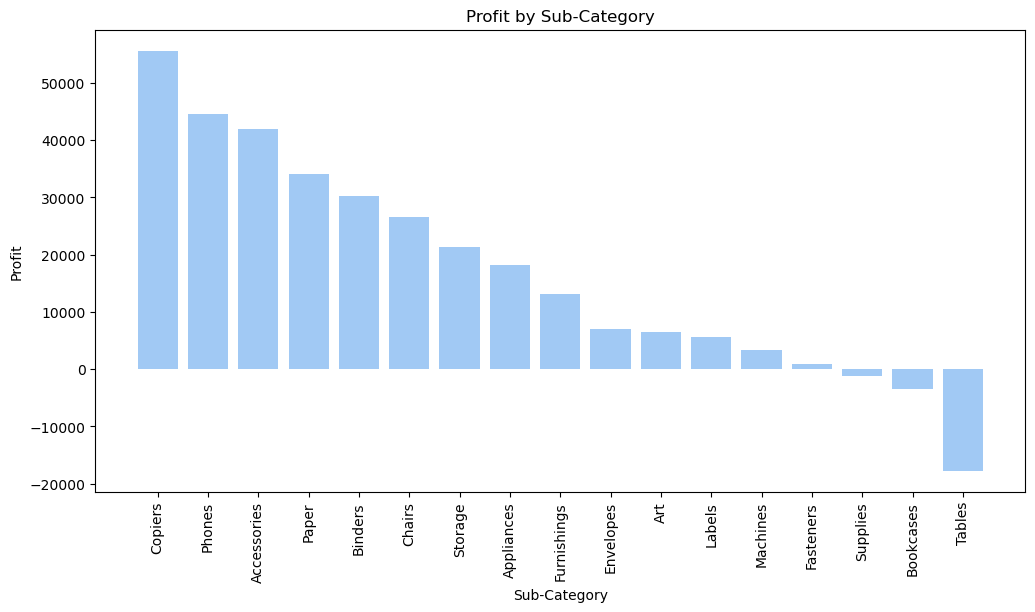

In [15]:
profit_by_sub_category = df.groupby('Sub-Category')['Profit'].sum().reset_index()

profit_by_sub_category = profit_by_sub_category.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(profit_by_sub_category['Sub-Category'], profit_by_sub_category['Profit'])
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit by Sub-Category')
plt.xticks(rotation=90)
plt.show()

# 6. Analyze the sales and profit by customer segment?

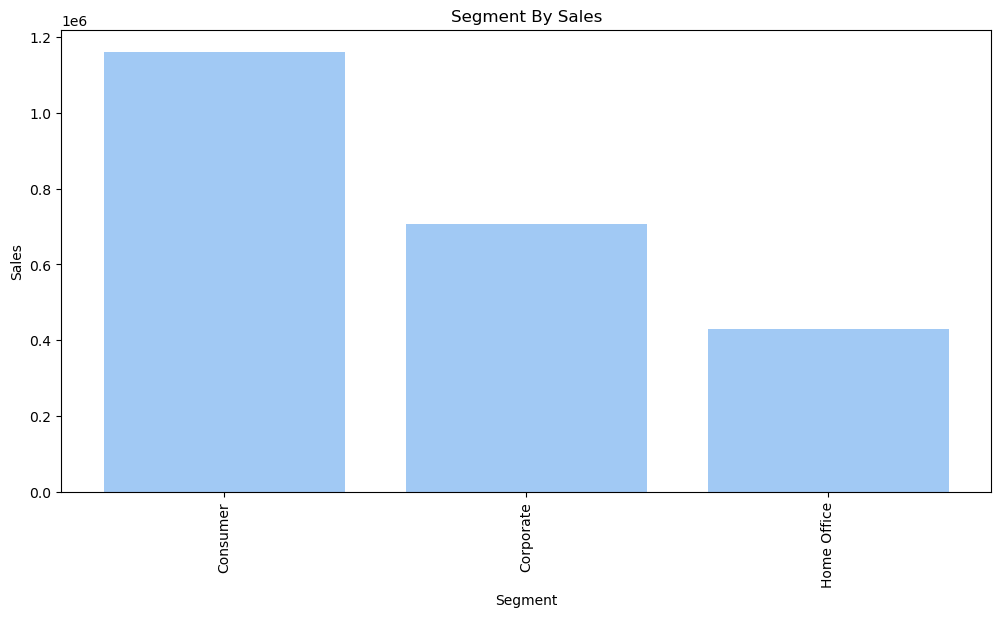

In [16]:
segment_by_sales = df.groupby('Segment')['Sales'].sum().reset_index()

segment_by_sales = segment_by_sales.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(segment_by_sales['Segment'], segment_by_sales['Sales'])
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Segment By Sales')
plt.xticks(rotation=90)
plt.show()

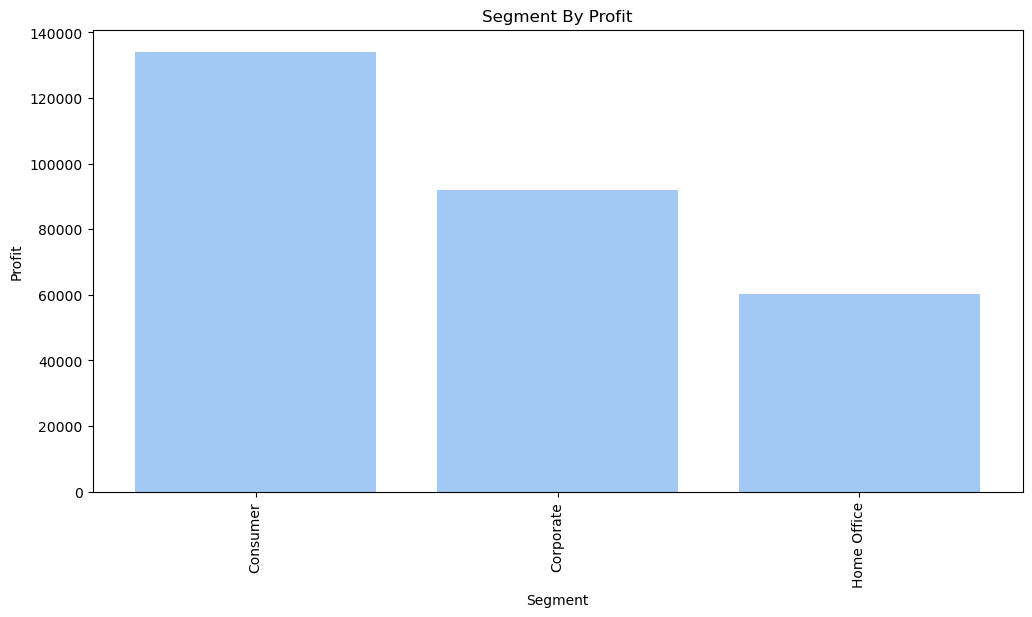

In [17]:
segment_by_sales = df.groupby('Segment')['Profit'].sum().reset_index()

segment_by_sales = segment_by_sales.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(segment_by_sales['Segment'], segment_by_sales['Profit'])
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Segment By Profit')
plt.xticks(rotation=90)
plt.show()

# 7. Analyze the sales to profit ratio?

In [18]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']]

,Segment,Sales_to_Profit_Ratio
0,Consumer,8.659471
1,Corporate,7.677245
2,Home Office,7.125416
